582/582 [==============================] - 128s 217ms/step - loss: 0.6782 - accuracy: 0.6399 - val_loss: 0.5447 - val_accuracy: 0.7274
Number of Adversarial Images: 32
1/1 [==============================] - 0s 82ms/step


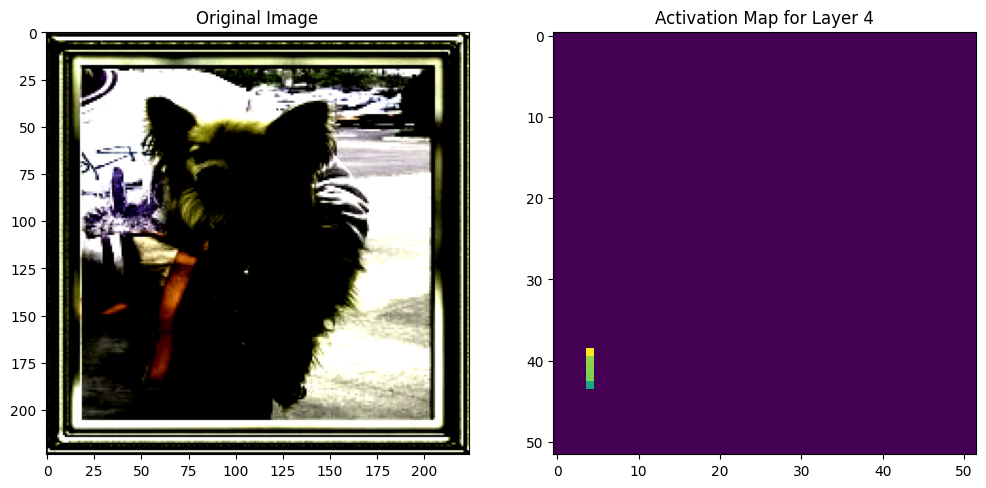

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
dataset, dataset_info = tfds.load('cats_vs_dogs', split='train', with_info=True, as_supervised=True)
num_classes = 2
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    image = tf.image.random_hue(image, max_delta=0.1)
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)
    image = tf.image.per_image_standardization(image)
    label = tf.one_hot(label, num_classes)
    return image, label
dataset = dataset.map(preprocess_image)
num_samples = dataset_info.splits['train'].num_examples
num_train_samples = int(0.8 * num_samples)
num_val_samples = int(0.1 * num_samples)
num_test_samples = num_samples - num_train_samples - num_val_samples
train_dataset = dataset.take(num_train_samples)
remaining_dataset = dataset.skip(num_train_samples)
val_dataset = remaining_dataset.take(num_val_samples)
test_dataset = remaining_dataset.skip(num_val_samples)
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
class_names = dataset_info.features['label'].names
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_dataset, epochs=1, validation_data=val_dataset)
art_classifier = TensorFlowV2Classifier(
    model=model,
    nb_classes=num_classes,
    input_shape=(224, 224, 3),
    loss_object=tf.keras.losses.CategoricalCrossentropy(),
)
attack = FastGradientMethod(estimator=art_classifier, eps=0.2)
adversarial_test_images = attack.generate(test_images.numpy(), y=test_labels.numpy())
num_adversarial_images = adversarial_test_images.shape[0]
print(f"Number of Adversarial Images: {num_adversarial_images}")
def generate_activation_map(model, layer_index, input_image):
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[layer_index].output)
    activation = activation_model.predict(input_image[tf.newaxis, ...])
    return activation[0]
layer_index_to_visualize = 4
image_to_visualize = test_images[0]

activation_map = generate_activation_map(model, layer_index_to_visualize, image_to_visualize)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_to_visualize)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(activation_map[:, :, 0], cmap='viridis')
plt.title(f'Activation Map for Layer {layer_index_to_visualize}')

plt.show()

In [1]:
pip install adversarial-robustness-toolbox


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.6 MB/s eta 0:00:00
